# Load and visulize the original data

In [3]:
import numpy as np
from jax import grad
import jax.numpy as jnp 
import matplotlib.pyplot as plt 

datapath = "./"

In [153]:
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# take input/output pairs from data
x = data[:-1, :]
y = data[-1:, :] 

In [83]:
print(x.shape)
print(x)

print(y.shape)
print(y)

(1, 11)
[[-0.12945952  0.17126776  0.18900687  0.62817746  0.98698383  1.1
   1.4         4.          4.3         4.5         4.7       ]]
(1, 11)
[[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]]


In [7]:
def class_plt(x , y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x.flatten(), y.flatten(), "ko")
    ax.set_xlabel("X", fontsize=16)
    ax.set_ylabel("Y", fontsize=16)
    plt.grid()
    plt.show()

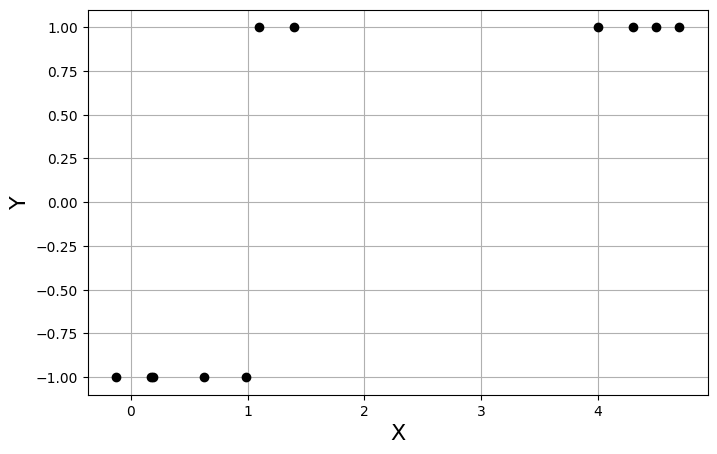

In [8]:
class_plt(x, y)

# Task1

In [117]:
def softmax_cost(w, x, y):
    # x_append_transpose = jnp.vstack([jnp.ones(len(x.shape)), x.flatten()]).T
    # tmp = -y.flatten()*jnp.dot(x_append_transpose, w)
    
    x_append_transpose = jnp.vstack([jnp.ones(x.shape[1]), x]).T
    tmp = -y*jnp.dot(x_append_transpose, w)
    cost = jnp.sum(jnp.log(1+jnp.exp(tmp)))/y.flatten().size
    return cost

def perceptron(w, x, y):
    x_append_transpose = jnp.vstack([jnp.ones(x.shape[1]), x]).T
    tmp = -y*jnp.dot(x_append_transpose, w)
    cost = jnp.sum(jnp.where(tmp>0, tmp, 0))/y.flatten().size
    # cost = jnp.sum(jnp.log(1+jnp.exp(tmp)))/y.flatten().size
    return cost

In [118]:
def gradient_descent_adam(cost_func, x, y, alpha=1e-2, iterations=500):
	gradient = grad(cost_func, argnums=0)

	# w = np.array([3.,3.])
	w_dim = x.shape[0]+1
	w = np.random.rand(w_dim)
	cost = cost_func(w, x, y)
	w_history = [w, ]
	cost_history = [cost, ]
	alpha_initial = np.empty(0)
	alpha_initial.fill(alpha)  # learning rate for w0 and w1
	beta = 0.9
	beta_2 = 0.999
	epsilon = 1e-8
	grad_history = [gradient(w, x, y), ]
	momentum_history = [np.zeros(w_dim), ]
	secondary_list = [np.zeros(w_dim), ]

	for i in np.arange(1, iterations, 1):
		# get gradient
		w_grad = gradient(w, x, y)
		grad_history.append(w_grad)

		# get momentum
		momentum = (1 - beta) * w_grad + beta * momentum_history[-1]
		momentum_history.append(momentum)

		# second derivative estimate
		w_grad_square = w_grad ** 2
		secondary = beta_2 * secondary_list[-1] + (1 - beta_2) * w_grad_square
		secondary_list.append(secondary)

		# momentum with normalization <-- adam
		w = w - ((alpha * momentum / (1 - jnp.power(beta, i))) / (
					jnp.sqrt(secondary / (1 - jnp.power(beta_2, i))) + epsilon))
		w_history.append(w)

		# cost
		cost = cost_func(w, x, y)
		cost_history.append(cost)

	return w_history, cost_history

In [154]:
w_history, cost_history = gradient_descent_adam(softmax_cost, x, y, alpha=1e-1, iterations=2000)

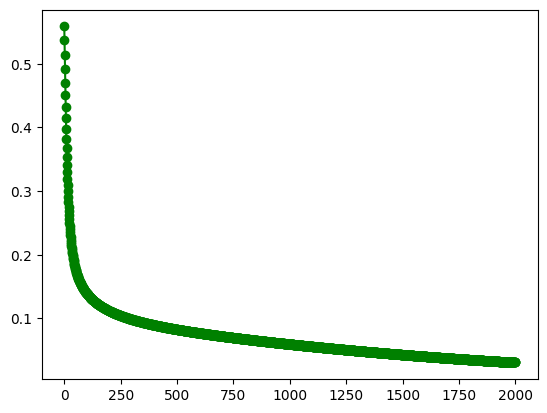

In [155]:
plt.plot(cost_history, "go-")

In [156]:
x_fitted = jnp.linspace(-1, 5, 200)
y_fitted = jnp.tanh(w_history[-1][0] + w_history[-1][1]*x_fitted)

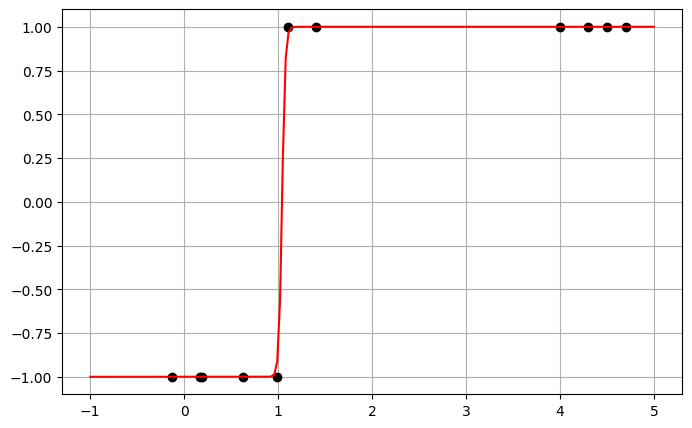

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(x.flatten(), y.flatten(), "ko")
ax.plot(x_fitted, y_fitted, "r-")
plt.grid()
plt.show()

In [161]:
x0 = -w_history[-1][0] / w_history[-1][1]
print(f"The boundary: x = {x0}")
x_append_transpose = jnp.vstack([jnp.ones(x.shape[1]), x]).T
tmp = jnp.dot(x_append_transpose, w_history[-1])
# cost_points = jnp.log(1 + jnp.exp(tmp))
# misclassified = jnp.count_nonzero(cost_points)

The boundary: x = 1.0415500402450562


In [163]:
print(jnp.sign(tmp))

[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]


In [160]:
print(y)

[[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]]


In [167]:
miss = jnp.sum(jnp.sign(tmp)-y)

In [170]:
print(miss)

0.0


# Task2

In [171]:
csvname = datapath + 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1, :]
y = data[-1:, :] 

print(np.shape(x)) # (8, 699)
print(np.shape(y)) # (1, 699)

(8, 699)
(1, 699)


In [20]:
print(x)
print(y)

[[ 5.  5.  3. ...  5.  4.  4.]
 [ 1.  4.  1. ... 10.  8.  8.]
 [ 1.  4.  1. ... 10.  6.  8.]
 ...
 [ 3.  3.  3. ...  8. 10. 10.]
 [ 1.  2.  1. ... 10.  6.  4.]
 [ 1.  1.  1. ...  2.  1.  1.]]
[[ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.
  -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.
   1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.
   1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1.
  -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
   1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.
   1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.
   1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1

In [145]:
w_history_percep, cost_history_percep = gradient_descent_adam(perceptron, x, y, alpha=1e-1, iterations=2000)

In [146]:
w_history_softmax, cost_history_softmax = gradient_descent_adam(softmax_cost, x, y, alpha=1e-1, iterations=2000)

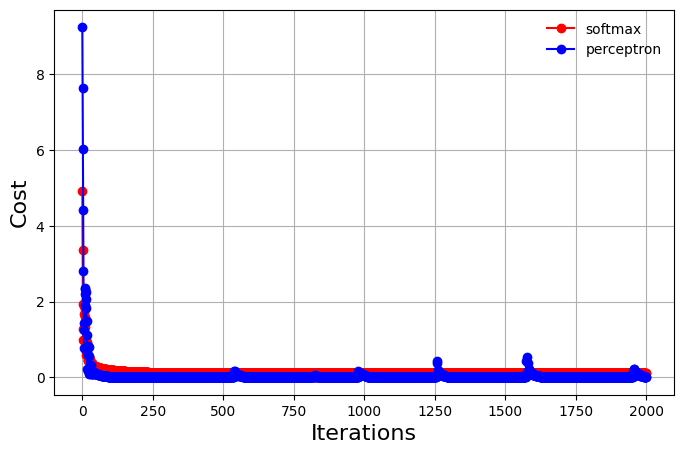

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(cost_history_softmax, "ro-", label="softmax")
ax.plot(cost_history_percep, "bo-", label="perceptron")
ax.set_xlabel("Iterations", fontsize=16)
ax.set_ylabel("Cost", fontsize=16)
plt.grid()
plt.legend(frameon=False)
plt.show()

## Misclassifications of each training

In [172]:
x_append_transpose = jnp.vstack([jnp.ones(x.shape[1]), x]).T

In [173]:
tmp_softmax = -y*jnp.dot(x_append_transpose, w_history_softmax[-1])
tmp_percep = -y*jnp.dot(x_append_transpose, w_history_percep[-1])

In [150]:
# cost = jnp.sum(jnp.log(1+jnp.exp(tmp)))/y.flatten().size
cost_softmax = jnp.where(tmp_softmax>0, tmp_softmax, 0)
cost_percep = jnp.where(tmp_percep>0, tmp_percep, 0)

In [151]:
jnp.count_nonzero(cost_softmax)

DeviceArray(27, dtype=int32)

In [152]:
jnp.count_nonzero(cost_percep)

DeviceArray(36, dtype=int32)

In [174]:
predicted_softmax = jnp.sign(jnp.dot(x_append_transpose, w_history_softmax[-1]))

In [179]:
jnp.count_nonzero(predicted_softmax-y)

DeviceArray(27, dtype=int32)

In [185]:
tmp = jnp.dot(x_append_transpose, w_history_softmax[-1])
predicted_classes = jnp.sign(tmp)
class_positive1_actual = jnp.count_nonzero(y==1)
class_negative1_actual = jnp.count_nonzero(y==-1)
class_positive1_predict = jnp.count_nonzero(predicted_classes==1)
class_negative1_predict = jnp.count_nonzero(predicted_classes==-1)

In [186]:
class_positive1_actual

DeviceArray(458, dtype=int32)

In [187]:
class_negative1_actual

DeviceArray(241, dtype=int32)

In [188]:
class_positive1_predict

DeviceArray(457, dtype=int32)

In [189]:
class_negative1_predict

DeviceArray(242, dtype=int32)

In [190]:
predicted_classes-y

DeviceArray([[ 0., -2.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  2., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
               0.,  0.,  0.,  0.,  0.,